
---
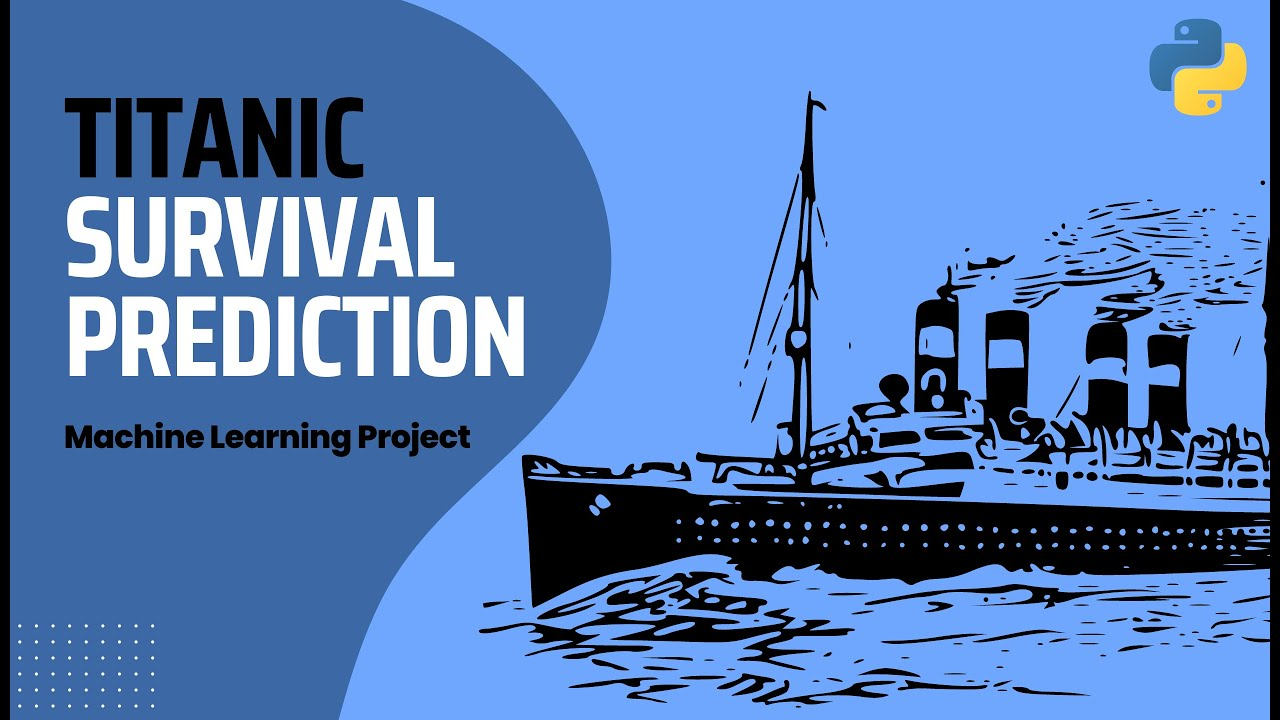

---

**Objectives:**




*   Basic Exploratory Data Analysis.

*  Feature Analysis.

* Titanic Survival Dataset.




**About the Model:**

This is a Machine learning challenges to familiarize of given data.

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

 ***Challenge***

In this challenge we build a predictive model that answer the question: "What sorts of people were more likely to survive?" using passenger data(ex; name,age,gender, socio-economic class etc..)


**Import Libraries**

In [108]:
import numpy as np
import pandas as pd                 # Data processing (Load the data from dataset)
import matplotlib.pyplot as plt     # Data Visualization
import seaborn as sns
import missingno as msno            # Visualize and analyze missing data in a dataset
import plotly.offline as py         # Create interactive charts and visualizations that can be viewed offline, without requiring an active internet connection to Plotly's servers.
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import random

# importing sklearn libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**Import Dataset**

In [73]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_s = pd.read_csv('gender_submission.csv')

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [76]:
train.shape

(891, 12)

In [77]:
test.shape

(418, 11)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 **Exploratory Data Analysis**

*  **Missing Value Analysis**




In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

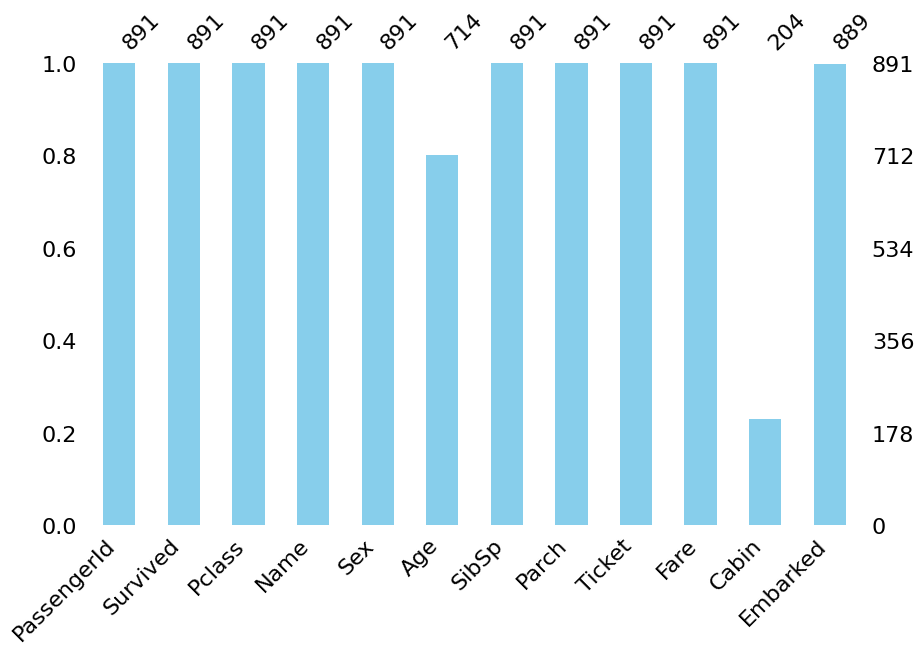

In [80]:
msno.bar(train, color = 'skyblue', figsize = (10,6))

In [81]:
trace = go.Pie(labels = list(train.Survived.unique()), values = list(train.Survived.value_counts()))
data = [trace]
layout = go.Layout(
   {
      "title":"Number of Passenger Survived",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

**Target Variable**

* **Categorical variable Analysis:**

In [82]:
# Function for Generate Random colors in chart.
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [48]:
data = [go.Bar(
   x = list(train.Survived.unique()),
   y = list(train.Survived.value_counts()),
   marker = dict(color = random_colors(len(train.Survived.unique())),line=dict(color='#000000', width=1.5)))]

layout = go.Layout(
   {
      "title":"Number of Passenger Survived:",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [83]:
trace = go.Pie(labels = list(train.Survived.unique()), values = list(train.Survived.value_counts()))
data = [trace]
layout = go.Layout(
   {
      "title":"Number of Passenger Survived:",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

* **Numerical variable Analysis**

In [84]:
fig = go.Figure(
    data=[go.Histogram(x=train['Age'])],layout_title_text=' Age Distribution ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [85]:
fig = go.Figure(
    data=[go.Histogram(x=train["Fare"])],layout_title_text="Fare",layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [86]:
fig = go.Figure(
    data=[go.Histogram(x=train['PassengerId'])],layout_title_text=' PassengerId Distribution ',layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

* **Bivariate Data Analysis**

In [87]:
# 1 --> Survived Vs Sex
survivedvssex = train[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig = px.bar(survivedvssex, x="Sex", y="Survived",color="Survived")
fig.show()

In [89]:
# 2 --> Survived Vs parch
survivedvsparch = train[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig = px.bar(survivedvsparch, x="Parch", y="Survived",color="Survived")
fig.show()

In [90]:
# 3 --> Survived Vs SibSp
survivedvsSibSp = train[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig = px.bar(survivedvsSibSp, x="SibSp", y="Survived",color="Survived")
fig.show()

In [91]:
# 4 --> Embarked VS Survived
survivedvsEmbarked = train[["Embarked","Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by="Survived",ascending = False)
fig = px.bar(survivedvsEmbarked, x="Embarked", y="Survived",color="Survived")
fig.show()

In [92]:
# 5 --> Sex VS Age
fig = px.box(train, x="Sex", y="Age", color="Survived", notched=True)
fig.show()

In [93]:
# 6 --> Pclass VS Age
fig = px.box(train, x="Pclass", y="Age", color="Survived", notched=True)
fig.show()

In [94]:
# 7 --> Age VS Survived

fig = px.histogram(train, x="Age", color="Survived")
fig.show()

* **Correlation**


In [100]:
# Assuming 'train' is your DataFrame
# Select only numerical columns before calculating correlations
numerical_train = train.select_dtypes(include=['number'])

fig = px.density_heatmap(numerical_train.corr())
fig.show()

**Model Training**

In [103]:
# creating train test split
Xtrain = train.iloc[:, [2, 4, 5, 6, 7]].values
ytrain = train.iloc[:, 1].values
Xtest = test.iloc[:, [1, 3, 4, 5, 6]].values
ytest = gender_s.iloc[:, 1].values

# labeling genders
le1 = LabelEncoder()
Xtrain[:, 1] = le1.fit_transform(Xtrain[:, 1])
Xtest[:, 1] = le1.fit_transform(Xtest[:, 1])

# dealing with NaN data
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
XTrainImp = imp.fit_transform(Xtrain)
XTestImp = imp.fit_transform(Xtest)

# feature scaling
sc = StandardScaler()
XTrainImp = sc.fit_transform(XTrainImp)
XTestImp = sc.transform(XTrainImp)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XTrainImp, ytrain, test_size = 0.2, random_state = 0)

**Logistic Regression:**

Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems. We can construct a logistic regression model using the LogisticRegression class


In [113]:
# Logistic Regression

Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('Accuracy score is ',accuracy_score(y_pred,y_test)*100)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

[[92 18]
 [17 52]]
Accuracy score is  80.44692737430168
